# Обучение без учителя
Мы не знаем "правильный ответ". Результат очень зависит от конкретного метода.

## Кластеризация
Поиск групп "похожих" объектов. Похожа на классификацию, когда в задаче классы не заданы.
![image.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)


### Искусственный пример - просто двухмерные пятна

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal

a = pd.DataFrame(multivariate_normal([16, 120], [[1, 0], [0, 20]], seed=1).rvs(100), columns=['x1', 'x2'])
b = pd.DataFrame(multivariate_normal([10, 100], [[1, 0], [0, 20]], seed=1).rvs(100), columns=['x1', 'x2'])
c = pd.DataFrame(multivariate_normal([1, 150], [[1, 0], [0, 20]], seed=1).rvs(100), columns=['x1', 'x2'])
a['class'] = 'a'
b['class'] = 'b'
c['class'] = 'c'
abc = pd.concat([a, b, c])

In [2]:
Xa = abc.drop(columns=['class'])
abc.sample(5)

,x1,x2,class
89,15.680198,123.041365,a
42,16.119009,120.886823,a
24,1.617203,150.537367,c
95,10.369493,105.189192,b
86,0.751365,161.307016,c


#### KMeans

<img src="https://ds055uzetaobb.cloudfront.net/brioche/uploads/y4KGN92h7r-screen-shot-2016-05-05-at-43007-pm.png?width=1200">

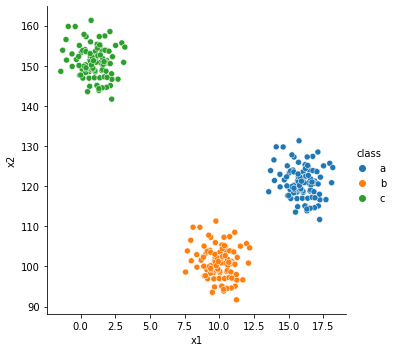

In [3]:
import seaborn as sns
fg = sns.relplot(x='x1', y='x2', hue='class', data=abc)

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=1)
km.fit(Xa)
km

KMeans(n_clusters=3, random_state=1)

In [5]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [6]:
abc['cluster'] = km.labels_

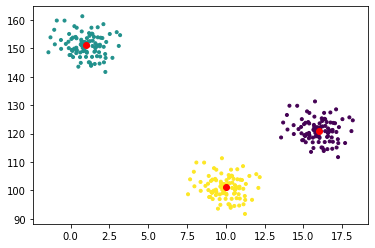

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x='x1', y='x2', c='cluster', marker='.', data=abc)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', marker='o')

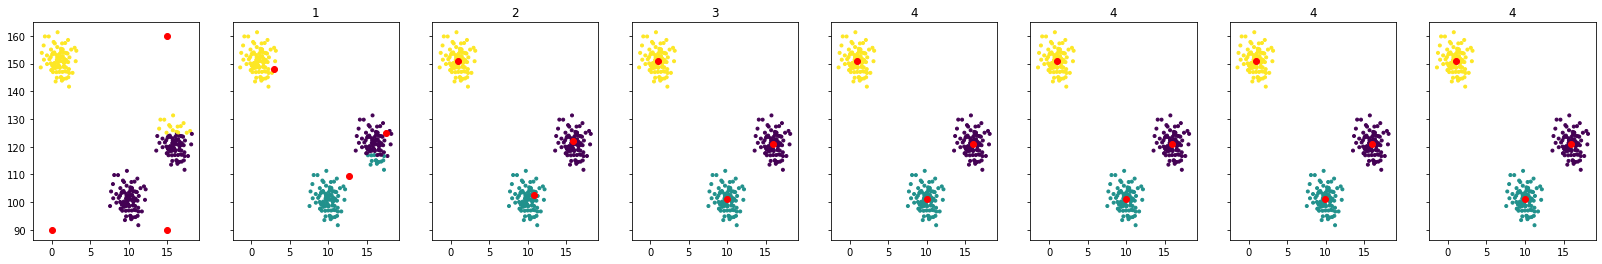

In [8]:
from sklearn.metrics import pairwise_distances_argmin, silhouette_score

n=7
fig, plots = plt.subplots(1, n+1, figsize=(4*n, 4), sharex=True, sharey=True)
inertia = []
score = []
initial = np.array([[0, 90], [15, 90], [15, 160]])
# initial = 'random'
# initial = 'k-means++'

plots[0].scatter(initial[:, 0], initial[:, 1], c='red', marker='o')
labels0 = pairwise_distances_argmin(abc[['x1', 'x2']].values, initial)
plots[0].scatter(x='x1', y='x2', c=labels0, marker='.', data=abc)

for i in range(1, n+1):
  km = KMeans(n_clusters=3, n_init=1, init=initial, max_iter=i, random_state=5).fit(Xa)
  plots[i].scatter(x='x1', y='x2', c=km.labels_, marker='.', data=abc)
  plots[i].scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', marker='o')
  plots[i].set_title(km.n_iter_)
  inertia.append(km.inertia_)
  score.append(silhouette_score(Xa, km.labels_))

[15209.175249236428, 5146.187207529178, 4695.240824582766, 4695.240824582766, 4695.240824582766, 4695.240824582766, 4695.240824582766]


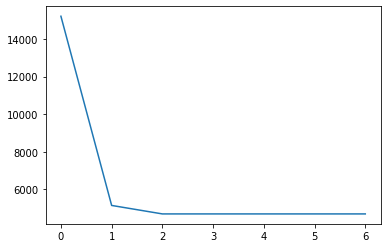

In [9]:
print(inertia)
plt.plot(inertia)

[0.7321704529958815, 0.7981860816149168, 0.7981860816149168, 0.7981860816149168, 0.7981860816149168, 0.7981860816149168, 0.7981860816149168]


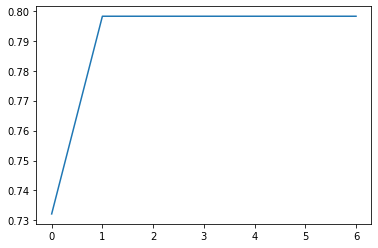

In [10]:
print(score)
plt.plot(score)

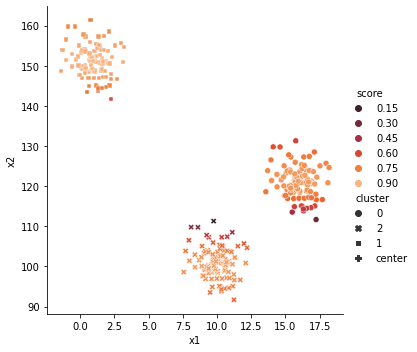

In [11]:
from sklearn.metrics import silhouette_score, silhouette_samples
abc['score'] = silhouette_samples(Xa, abc.cluster)
centers = pd.DataFrame(km.cluster_centers_, columns=['x1', 'x2'])
centers['class'] = 'center'
centers['cluster'] = 'center'
centers
sns.relplot(x='x1', y='x2', hue='score', style='cluster', hue_norm=(-1, 1), palette="icefire", data=pd.concat([abc, centers]))

#### MeanShift

<img src="https://image.slidesharecdn.com/icdmtrackingandpursuit-140523110059-phpapp02/95/implementing-camshift-on-a-mobile-robot-for-person-tracking-and-pursuiticdm-9-638.jpg?cb=1400843848">

In [12]:
abc.sample(5)

,x1,x2,class,cluster,score
45,10.185156,105.361724,b,2,0.694450
42,10.119009,100.886823,b,2,0.844731
84,14.103639,129.797107,a,0,0.632155
20,15.112371,119.142085,a,0,0.803328
93,16.240737,122.516744,a,0,0.842058


In [13]:
from sklearn.cluster import estimate_bandwidth
estimate_bandwidth(Xa)

8.194741581031835

In [14]:
from sklearn.cluster import MeanShift

ms = MeanShift()
abc['cluster'] = ms.fit_predict(Xa)
abc['cluster'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
ms.cluster_centers_

array([[ 16.01018278, 120.82077323],
       [ 10.01018278, 100.82077323],
       [  1.01018278, 150.82077323]])

In [16]:
centers = pd.DataFrame(ms.cluster_centers_, columns=['x1', 'x2'])
centers['class'] = 'center'
centers['cluster'] = 'center'
centers

,x1,x2,class,cluster
0,16.010183,120.820773,center,center
1,10.010183,100.820773,center,center
2,1.010183,150.820773,center,center


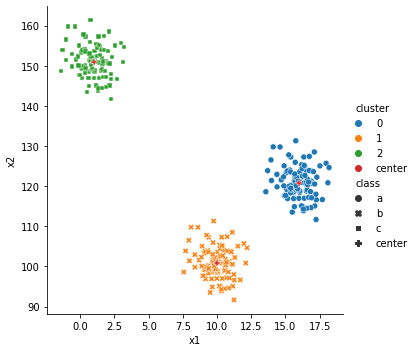

In [17]:
import seaborn as sns
sns.relplot(x='x1', y='x2', hue='cluster', style='class', data=pd.concat([abc, centers]))

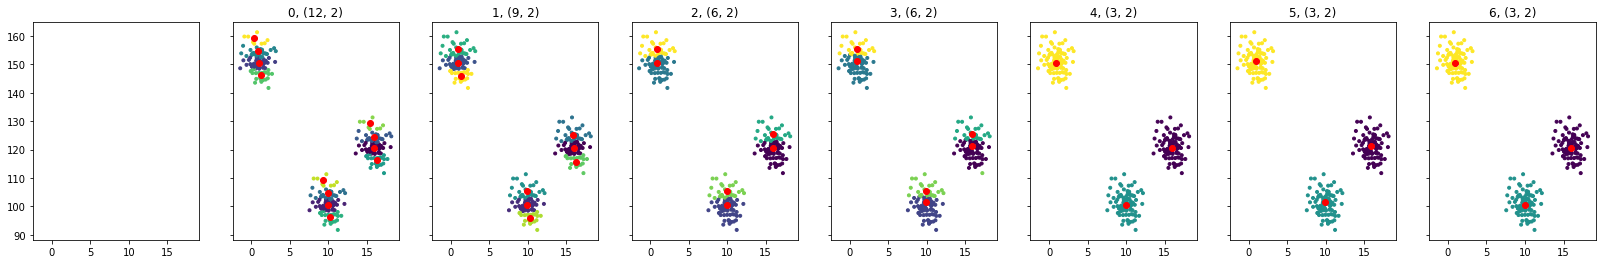

In [18]:
n=7
fig, plots = plt.subplots(1, n+1, figsize=(4*n, 4), sharex=True, sharey=True)
initial = abc[['x1', 'x2']].values

for i in range(1, n+1):
  ms = MeanShift(max_iter=i-1, bandwidth=4, seeds=initial).fit(Xa)
  plots[i].scatter(x='x1', y='x2', c=ms.labels_, marker='.', data=abc)
  plots[i].scatter(ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1], c='red', marker='o')
  plots[i].set_title(f"{ms.n_iter_}, {ms.cluster_centers_.shape}")

**почему так?**

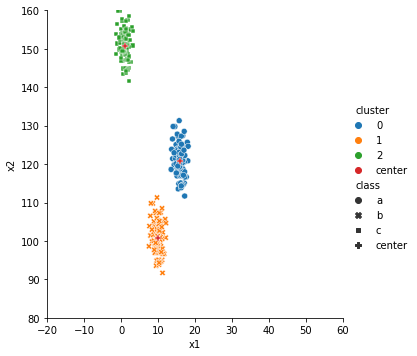

In [19]:
sns.relplot(x='x1', y='x2', hue='cluster', style='class', data=pd.concat([abc, centers]))\
  .set(xlim=(-20, 60),ylim=(80, 160))


#### Препроцессинг, pipeline




In [20]:
Xa = abc.drop(columns=['class', 'cluster', 'score'])
abc.sample(5)

,x1,x2,class,cluster,score
96,2.111057,158.517893,c,2,0.802644
74,16.682551,121.039747,a,0,0.841782
85,10.901487,97.106901,b,1,0.803146
74,1.682551,151.039747,c,2,0.899373
76,18.186980,124.645765,a,0,0.790847


In [21]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

nkm = Pipeline([('prep', RobustScaler()), ('clusterer', KMeans(3))])
nkm.fit(Xa)

Pipeline(steps=[('prep', RobustScaler()), ('clusterer', KMeans(n_clusters=3))])

In [22]:
nkm['prep'].transform(Xa).shape

(300, 2)

In [23]:
abc['nx1'], abc['nx2'] = nkm['prep'].transform(Xa).transpose()

In [24]:
abc['cluster']=nkm['clusterer'].labels_

In [25]:
abc.head()

,x1,x2,class,cluster,score,nx1,nx2
0,15.388244,127.264293,a,0,0.750551,0.389149,0.140139
1,14.927031,117.637944,a,0,0.739701,0.355603,-0.073776
2,13.698461,123.870221,a,0,0.789673,0.266241,0.064716
3,15.238793,127.803035,a,0,0.737109,0.378279,0.152110
4,15.750630,121.426786,a,0,0.844935,0.415508,0.010419


In [26]:
centers = pd.DataFrame(nkm['clusterer'].cluster_centers_, columns=['nx1', 'nx2'])
centers['class'] = 'center'
centers['cluster'] = 'center'
centers

,nx1,nx2,class,cluster
0,0.432681,0.001238,center,center
1,-0.658365,0.667890,center,center
2,-0.003737,-0.443197,center,center


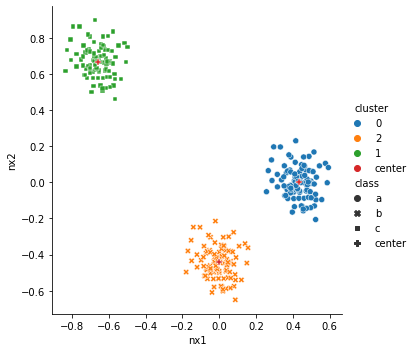

In [27]:
sns.relplot(x='nx1', y='nx2', hue='cluster', style='class', data=pd.concat([abc, centers]))

In [28]:
nkm.predict(Xa)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [29]:
nkm.transform(Xa)

array([[0.1455621 , 1.17294827, 0.70330675],
       [0.10755502, 1.25626348, 0.5153613 ],
       [0.1781339 , 1.10395387, 0.57520792],
       [0.1603808 , 1.15786826, 0.70733816],
       [0.01947268, 1.25915494, 0.61768454],
       [0.19297666, 1.08787521, 0.63593035],
       [0.06086693, 1.2854627 , 0.56537269],
       [0.11988894, 1.16469719, 0.64303994],
       [0.07434817, 1.24739253, 0.55078878],
       [0.04707289, 1.32516791, 0.64167786],
       [0.15650186, 1.42090086, 0.60724748],
       [0.07685276, 1.27794483, 0.69731947],
       [0.08286908, 1.20246717, 0.6417483 ],
       [0.07555738, 1.24113417, 0.55158759],
       [0.06307929, 1.33813153, 0.61870054],
       [0.09542838, 1.30565159, 0.54002298],
       [0.10912835, 1.27896705, 0.51609384],
       [0.08923227, 1.32734264, 0.56273314],
       [0.13477117, 1.36761094, 0.5505932 ],
       [0.15265316, 1.26019671, 0.76539907],
       [0.07598844, 1.24790043, 0.54888999],
       [0.157349  , 1.43503491, 0.65955437],
       [0.

### Нелинейный пример

In [30]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal

Na = 2000
Nb = 2000
a = pd.DataFrame({'distance': np.random.randn(Na)*10 + 130, 'angle': np.random.rand(Na) * 2*np.pi})
b = pd.DataFrame({'distance': np.random.randn(Nb)*10 + 40, 'angle': np.random.rand(Nb) * 2*np.pi})
a['class'] = 'a'
b['class'] = 'b'
ring = pd.concat([a, b])
ring['x1'] = ring.distance * np.cos(ring.angle)
ring['x2'] = ring.distance * np.sin(ring.angle)
Xr = ring[['x1', 'x2']]
ring.sample(5)

,distance,angle,class,x1,x2
1653,143.708367,0.298620,a,137.348302,42.279293
1234,125.553125,5.718495,a,106.061584,-67.190235
1533,27.123666,4.526551,b,-5.011640,-26.656645
508,139.335409,1.089122,a,64.549038,123.481893
954,30.389542,2.038752,b,-13.707579,27.122436


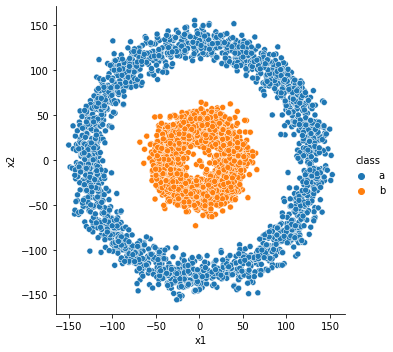

In [31]:
sns.relplot(x='x1', y='x2', hue='class', data=ring)

In [32]:
model = KMeans(2)
model.fit(Xr)
model

KMeans(n_clusters=2)

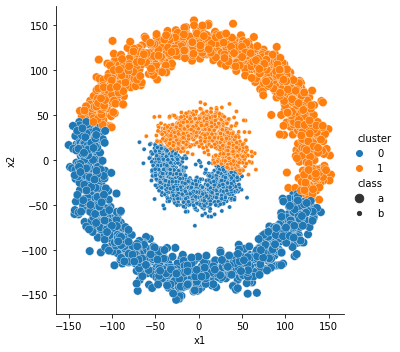

In [33]:
ring['cluster']=model.labels_
sns.relplot(x='x1', y='x2', hue='cluster', size='class', data=ring)

#### Задание
1. Применить другую модель, подходящую для кластеризации нелинейного примера.

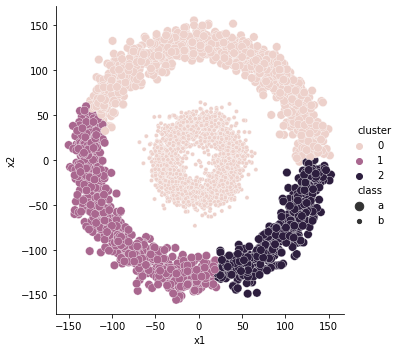

In [34]:
from sklearn.cluster import Birch
model = Birch()
model.fit(Xr)
ring['cluster']=model.labels_
sns.relplot(x='x1', y='x2', hue='cluster', size='class', data=ring)

### Mnist
На какие кластеры разбивается множество рукописных цифр?

In [35]:
import pandas as pd
mnist_train = pd.read_csv('/content/sample_data/mnist_train_small.csv', header=None)
mnist_test = pd.read_csv('/content/sample_data/mnist_test.csv', header=None)

In [36]:
X_mnist = mnist_train.loc[:, 1:]

In [37]:
from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering
mnist_model = MiniBatchKMeans(10)
mnist_model.fit(X_mnist)

MiniBatchKMeans(n_clusters=10)

In [38]:
mnist_cluster = mnist_train[[0]].rename(columns={0: 'target'})
mnist_cluster['cluster'] = mnist_model.labels_
mnist_cluster

,target,cluster
0,6,5
1,5,1
2,7,7
3,9,9
4,5,1
...,...,...
19995,0,8
19996,1,4
19997,2,3
19998,9,0


In [39]:
mnist_cluster['number'] = 1
mnist_cluster.groupby(['target', 'cluster']).sum()

number
target cluster        
0      0            11
       1            37
       2            25
       3            20
       4             4
...                ...
9      4           119
       5           150
       7             5
       8             7
       9           418

[92 rows x 1 columns]

In [40]:
cluster_counts = mnist_cluster.pivot_table('number', index='target', columns='cluster', aggfunc=np.sum, fill_value=0.)
cluster_counts

cluster,0,1,2,3,4,5,6,7,8,9
target,,,,,,,,,,
0,11,37,25,20,4,35,139,732,952,7
1,0,0,50,33,2153,0,4,0,0,3
2,20,33,157,1329,235,91,38,33,9,44
3,30,948,653,223,92,7,23,21,1,23
4,1213,2,65,3,92,354,40,4,0,151
5,266,483,365,12,338,17,81,155,9,35
6,2,6,8,7,78,773,1131,22,12,0
7,144,1,20,30,175,16,1,8,3,1728
8,301,188,782,371,205,20,16,13,7,9


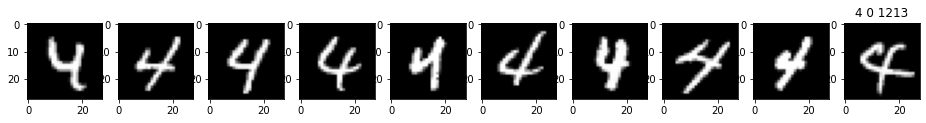

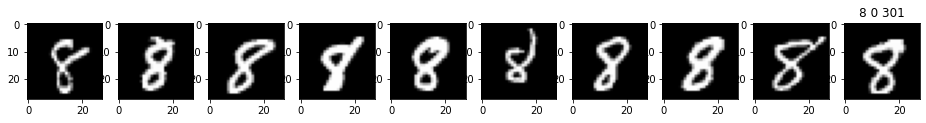

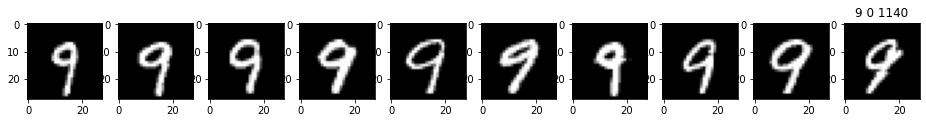

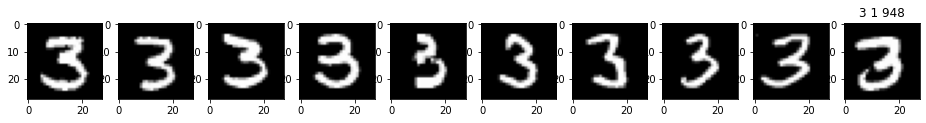

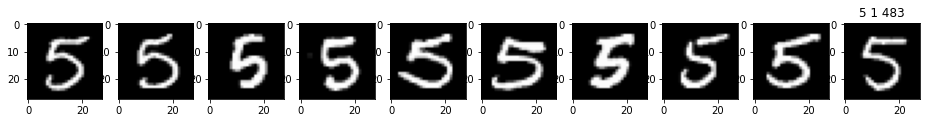

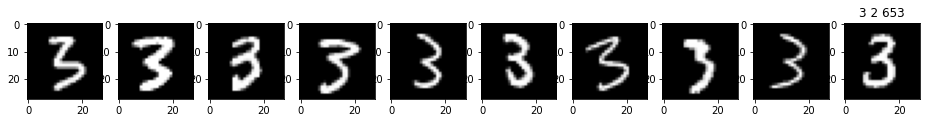

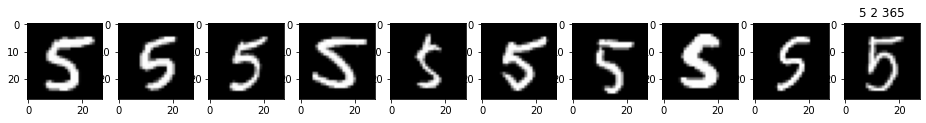

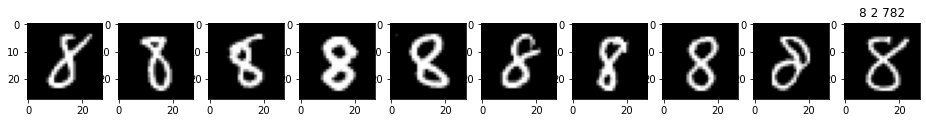

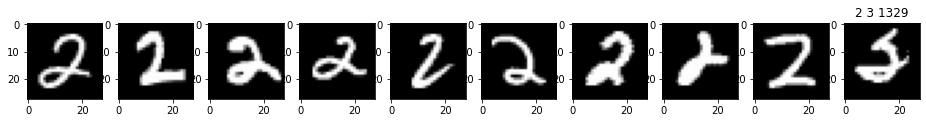

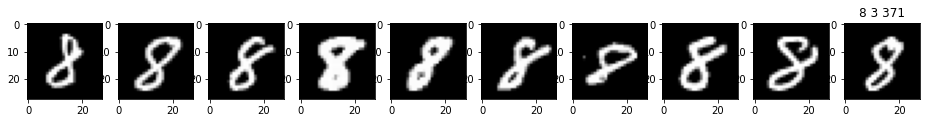

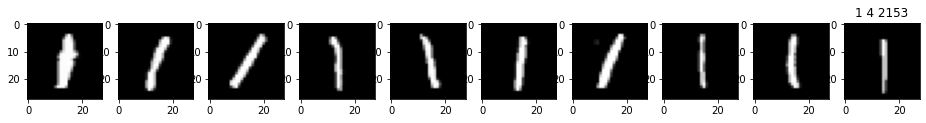

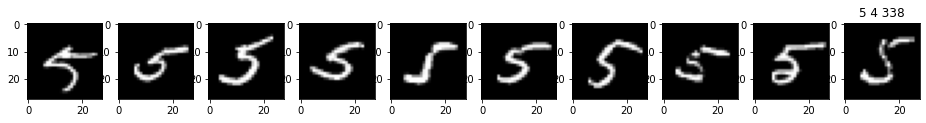

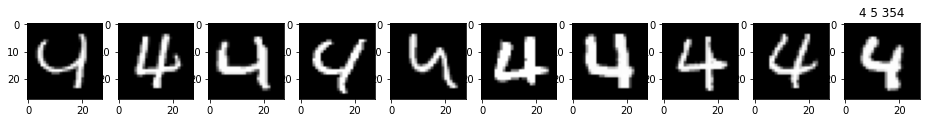

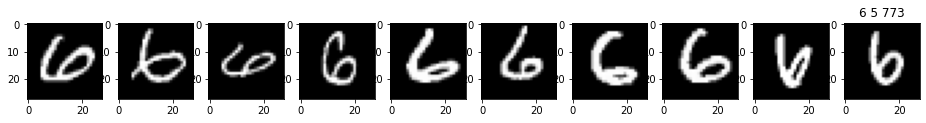

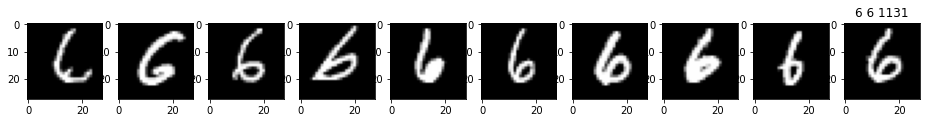

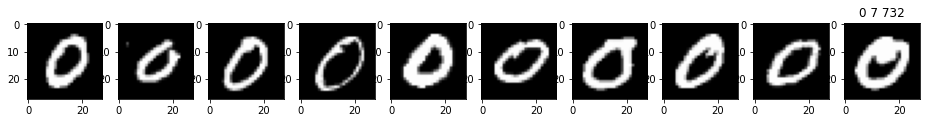

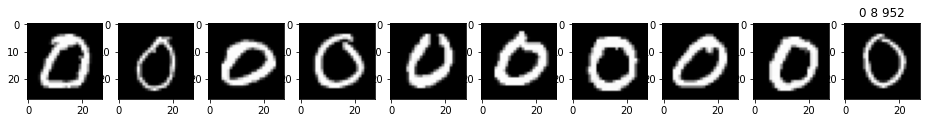

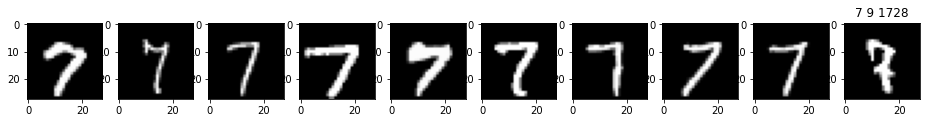

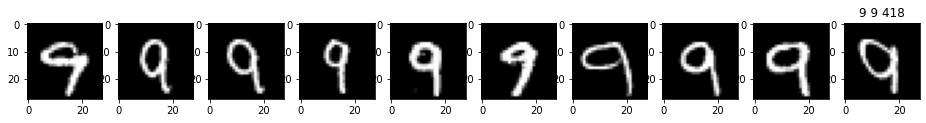

In [41]:
from matplotlib import pyplot as plt

n_ = 10
for cluster in range(10):
  for target in range(10):
    sample = X_mnist[(mnist_cluster.target==target) & (mnist_cluster.cluster==cluster)].iloc[:n_]
    if(cluster_counts.loc[target, cluster] > 300):
      fig, axes = plt.subplots(1, n_, figsize=(16, 4))
      plt.title(f'{target} {cluster} {cluster_counts.loc[target, cluster]}')
      for i in range(n_):
        img = sample.values[i].reshape((28, 28))
        axes[i].imshow(img, cmap='gray')


## Кластеризация на графах

### Графы с весом на рёбрах (расстоянием)

['A', 'B', 'C', 'D']

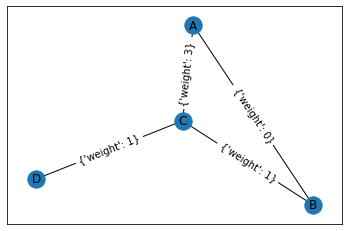

In [42]:
import networkx as nx
g = nx.Graph(directed=False)
g.add_edge('A', 'B', weight=0)
g.add_edge('B', 'C', weight=1)
g.add_edge('C', 'D', weight=1)
g.add_edge('A', 'C', weight=3)
pos=nx.spring_layout(g)
nx.draw_networkx(g, pos)
nx.draw_networkx_edge_labels(g, pos)
nx.shortest_path(g, 'A', 'D', weight='weight')

In [43]:
nx.to_pandas_edgelist(g)

,source,target,weight
0,A,B,0
1,A,C,3
2,B,C,1
3,C,D,1


In [46]:
nx.to_pandas_adjacency(g)

,A,B,C,D
A,0.0,0.0,3.0,0.0
B,0.0,0.0,1.0,0.0
C,3.0,1.0,0.0,1.0
D,0.0,0.0,1.0,0.0


### Кластеры на графе

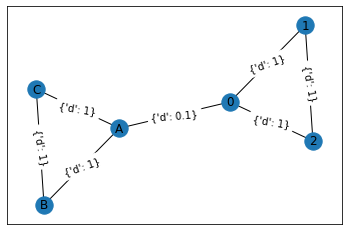

In [47]:
g = nx.from_edgelist([(0, 1, {'d': 1}),
                      (0, 2, {'d': 1}),
                      (1, 2, {'d': 1}),
                      ('A', 'B', {'d': 1}),
                      ('A', 'C', {'d': 1}),
                      ('B', 'C', {'d': 1}),
                      (0, 'A', {'d': 0.1})])
pos=nx.spring_layout(g)
nx.draw_networkx_edge_labels(g, pos)
nx.draw_networkx(g, pos)

In [48]:
X = nx.to_pandas_adjacency(g, weight='d')
X

,0,1,2,A,B,C
0,0.0,1.0,1.0,0.1,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0
A,0.1,0.0,0.0,0.0,1.0,1.0
B,0.0,0.0,0.0,1.0,0.0,1.0
C,0.0,0.0,0.0,1.0,1.0,0.0


In [49]:
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(affinity='precomputed')
X = nx.to_pandas_adjacency(g, weight='d')
model.fit(X)
X['cluster'] = model.labels_
X

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,0,1,2,A,B,C,cluster
0,0.0,1.0,1.0,0.1,0.0,0.0,0
1,1.0,0.0,1.0,0.0,0.0,0.0,0
2,1.0,1.0,0.0,0.0,0.0,0.0,0
A,0.1,0.0,0.0,0.0,1.0,1.0,1
B,0.0,0.0,0.0,1.0,0.0,1.0,1
C,0.0,0.0,0.0,1.0,1.0,0.0,1


### Кластеризация областей изображения

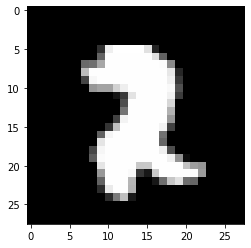

In [50]:
img = mnist_train.iloc[10, 1:].values.reshape((28, 28))
plt.imshow(img, cmap='gray')

In [51]:
from sklearn.feature_extraction import img_to_graph, grid_to_graph
grid_to_graph(3, 4).toarray()

array([[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]])

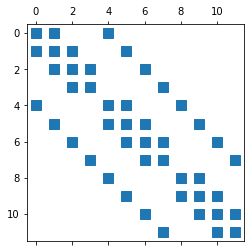

In [52]:
plt.spy(grid_to_graph(3, 4))

In [53]:
X = img_to_graph([[0, 0], [0, 0], [11, 12]])
pd.DataFrame(X.toarray())

,0,1,2,3,4,5
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,11,0
3,0,0,0,0,0,12
4,0,0,11,0,11,1
5,0,0,0,12,1,12


In [54]:
X

<6x6 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in COOrdinate format>

In [55]:
X.data = (12 - X.data)/12
pd.DataFrame(X.toarray())

,0,1,2,3,4,5
0,1.0,1.0,1.000000,0.0,0.000000,0.000000
1,1.0,1.0,0.000000,1.0,0.000000,0.000000
2,1.0,0.0,1.000000,1.0,0.083333,0.000000
3,0.0,1.0,1.000000,1.0,0.000000,0.000000
4,0.0,0.0,0.083333,0.0,0.083333,0.916667
5,0.0,0.0,0.000000,0.0,0.916667,0.000000


In [56]:
img_to_graph(img)

<784x784 sparse matrix of type '<class 'numpy.int64'>'
	with 3808 stored elements in COOrdinate format>

In [57]:
np.std(img_to_graph(img).data)

59.92997879627135

In [58]:
X = img_to_graph(img)
X.data = np.exp(- X.data/50)
X.toarray().shape

(784, 784)

In [59]:
X.toarray()[:5, :5]

array([[1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.]])

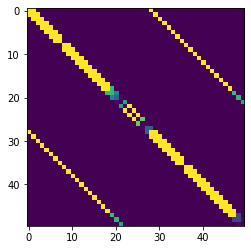

In [60]:
plt.imshow(X.toarray()[300:350, 300:350])

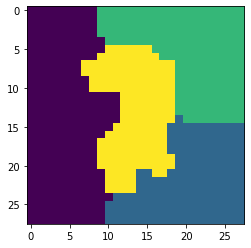

In [61]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(4, affinity='precomputed')
model.fit(X)
plt.imshow(model.labels_.reshape((28, 28)))

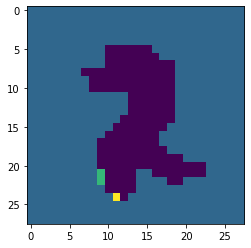

In [62]:
from sklearn.cluster import AgglomerativeClustering
X = img_to_graph(img)
model = AgglomerativeClustering(4, affinity='precomputed', linkage='average', connectivity=grid_to_graph(28, 28))
model.fit(X.toarray())
plt.imshow(model.labels_.reshape((28, 28)))

## Уменьшение размерности

### Простой пример - кошки

In [63]:
import numpy as np
N = 500
cats = pd.DataFrame()
genes = np.random.rand(N)
age = 12 * np.random.rand(N)
# luck = np.random.randn(N)
luck = np.zeros(N)
cats['weight'] =     2 * genes +  2  * age/12 + 0.5 * luck + 0.1 * np.random.randn(N)
cats['lives']  = 9 + 2 * genes -  3  * age/12 +       luck + 0.1 * np.random.randn(N)
cats['fur']    =     2 * genes + 0.5 * age/12 + 0.2 * luck + 0.1 * np.random.randn(N)

In [64]:
cats

,weight,lives,fur
0,1.218971,7.105470,0.200457
1,2.708642,8.013286,1.527466
2,1.004213,8.989856,0.820768
3,1.957185,10.418909,1.795243
4,2.779073,8.370268,1.725020
...,...,...,...
495,0.984851,10.023315,0.912774
496,0.982253,9.050219,0.529755
497,2.083625,9.096546,1.535483
498,3.484305,7.990780,2.409213


In [65]:
mid = np.array([2, 8.5, 1.25])
dg = np.array([2, 2, 2])
da = np.array([2, -3, 0.5])

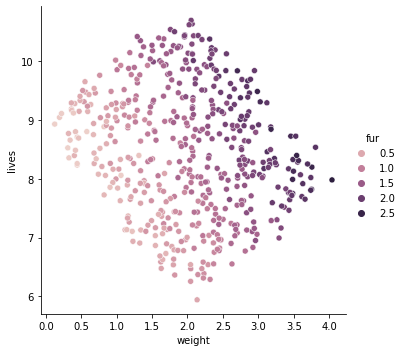

In [66]:
import seaborn as sns
sns.relplot(x='weight', y='lives', hue='fur', data=cats)

In [67]:
import plotly.graph_objs as go
vg = go.Scatter3d( x = [mid[0], (mid+dg)[0]],
                       y = [mid[1], (mid+dg)[1]],
                       z = [mid[2], (mid+dg)[2]],
                       marker = dict( size = 1,
                                      color = "red"),
                       line = dict( color = "red",
                                    width = 6)
                     )
va = go.Scatter3d( x = [mid[0], (mid+da)[0]],
                       y = [mid[1], (mid+da)[1]],
                       z = [mid[2], (mid+da)[2]],
                       marker = dict( size = 1,
                                      color = "green"),
                       line = dict( color = "green",
                                    width = 6)
                     )


In [68]:
import plotly.express as px
px.scatter_3d(cats, x='weight', y='lives', z='fur', size=age, color=genes).add_trace(vg).add_trace(va)

,weight,lives,fur
weight,1.000000,-0.199068,0.831880
lives,-0.199068,1.000000,0.333189
fur,0.831880,0.333189,1.000000


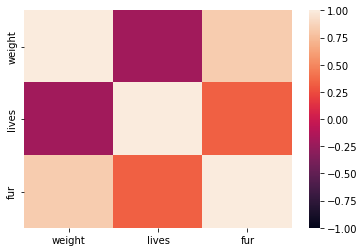

In [69]:
sns.heatmap(cats.corr(), vmin=-1, vmax=1)
cats.corr()

In [70]:
from sklearn.decomposition import PCA
pca_cats = PCA(2)
pca_cats.fit(cats)

PCA(n_components=2)

In [71]:
pca_cats.components_

array([[ 0.20129427, -0.96794974, -0.1501796 ],
       [ 0.80393078,  0.07566216,  0.58989027]])

In [72]:
pca_cats.explained_variance_ratio_

array([0.55211307, 0.44262244])

In [73]:
c = pca_cats.components_
v0 = go.Scatter3d( x = [mid[0], (mid+c[0])[0]],
                       y = [mid[1], (mid+c[0])[1]],
                       z = [mid[2], (mid+c[0])[2]],
                       marker = dict( size = 1,
                                      color = "red"),
                       line = dict( color = "red",
                                    width = 6)
                     )
v1 = go.Scatter3d( x = [mid[0], (mid+c[1])[0]],
                       y = [mid[1], (mid+c[1])[1]],
                       z = [mid[2], (mid+c[1])[2]],
                       marker = dict( size = 1,
                                      color = "green"),
                       line = dict( color = "green",
                                    width = 6)
                     )
# v2 = go.Scatter3d( x = [mid[0], (mid+c[2])[0]],
#                        y = [mid[1], (mid+c[2])[1]],
#                        z = [mid[2], (mid+c[2])[2]],
#                        marker = dict( size = 1,
#                                       color = "blue"),
#                        line = dict( color = "blue",
#                                     width = 6)
#                      )
px.scatter_3d(cats, x='weight', y='lives', z='fur', size=age, color=genes).add_trace(v0).add_trace(v1)#.add_trace(v2)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



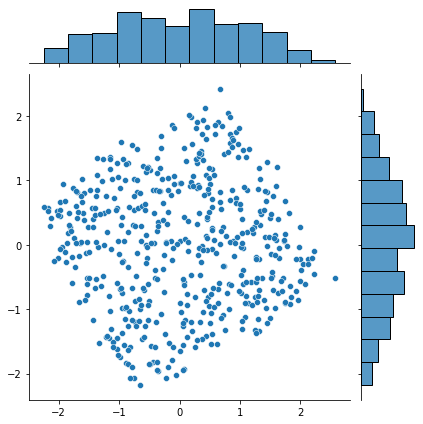

In [74]:
space = pca_cats.transform(cats)
sns.jointplot(space[:, 0], space[:, 1])

In [75]:
reconstructed = pd.DataFrame(pca_cats.inverse_transform(space), columns=['weight', 'lives', 'fur'])
reconstructed

,weight,lives,fur
0,1.186532,7.091588,0.246448
1,2.677205,7.999833,1.572035
2,1.061912,9.014547,0.738966
3,1.957589,10.419082,1.794671
4,2.765452,8.364439,1.744331
...,...,...,...
495,0.950965,10.008814,0.960815
496,0.909530,9.019099,0.632857
497,2.106314,9.106255,1.503316
498,3.604462,8.042198,2.238863


In [76]:
px.scatter_3d(reconstructed, x='weight', y='lives', z='fur', size=age, color=genes).add_trace(v0).add_trace(v1)#.add_trace(v2)#.add_trace(v2)

### Mnist

In [77]:
Y_mnist = mnist_train.loc[:, 0]
print(X_mnist.shape, Y_mnist.shape)

(20000, 784) (20000,)


In [78]:
from sklearn.decomposition import PCA
model = PCA(200)
model.fit(X_mnist)

PCA(n_components=200)

In [79]:
model.transform(X_mnist).shape

(20000, 200)

In [80]:
pc = pd.DataFrame(model.transform(X_mnist), columns=[str(i) for i in range(200)])
pc['y']=Y_mnist
pc.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,y
0,302.045751,12.674244,73.140000,707.245706,452.849782,691.066188,122.692735,6.251004,151.341064,-202.864119,...,0.440633,-23.532615,-4.797337,40.286147,30.947693,-26.796291,20.604281,-19.218621,10.351317,6
1,446.425058,-254.674840,-804.195220,-323.643809,244.546792,-135.324299,-322.729744,-120.429144,-251.606742,205.469057,...,-4.886702,60.196244,21.937883,12.232458,-19.280825,-12.531096,-60.254138,-6.051526,-61.022678,5
2,509.195419,729.946562,194.910547,-413.580987,837.806645,-388.816141,-223.765523,101.539742,98.079737,-239.866582,...,-27.097148,-5.108355,6.691585,4.398705,31.000112,-12.136630,35.637861,-5.803242,22.066184,7
3,346.917152,716.675620,-727.555752,193.008317,-79.268489,-321.915269,-355.985939,214.901778,341.379038,-64.686014,...,-17.941382,29.743864,0.047956,10.856084,7.603002,-9.229584,-41.610782,35.201144,15.577825,9
4,447.079993,-303.562088,-879.927904,-7.089729,363.344449,-51.042599,-241.113493,-273.595181,22.302167,483.392781,...,-9.901445,-8.427438,9.030173,-43.051971,-31.468075,-18.234234,21.178079,14.926981,27.344549,5


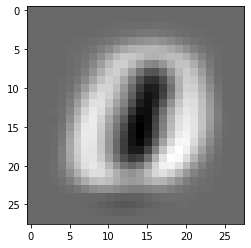

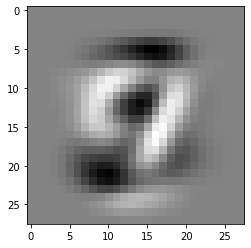

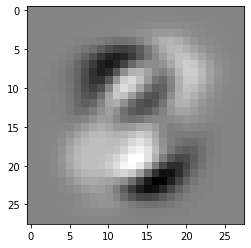

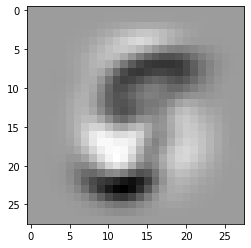

<Figure size 432x288 with 0 Axes>

In [81]:
from matplotlib import pyplot as plt
for i in range(4):
  plt.imshow(model.components_[i].reshape((28, 28)), cmap='gray')
  plt.figure()

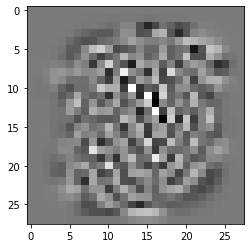

In [82]:
plt.imshow(model.components_[199].reshape((28, 28)), cmap='gray')

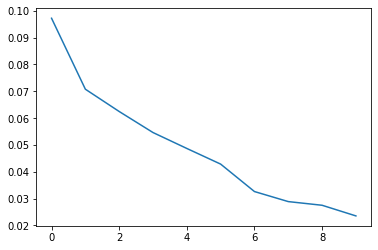

In [83]:
plt.plot(model.explained_variance_ratio_[:10])

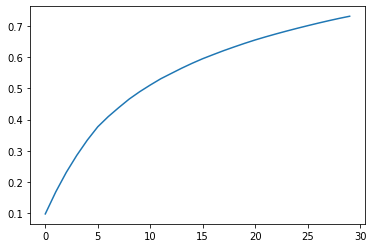

In [84]:
plt.plot(model.explained_variance_ratio_.cumsum()[:30])

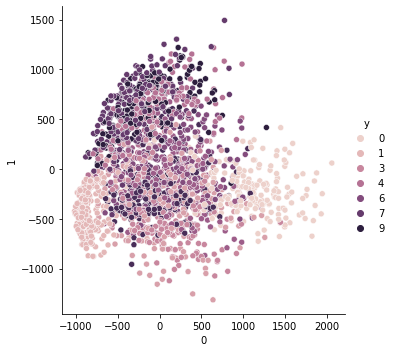

In [85]:
sns.relplot(data=pc.sample(2000), x='0', y='1', hue='y')

In [86]:
from sklearn.manifold import TSNE
sample = mnist_train.sample(5000)
embedding = TSNE().fit_transform(sample.loc[:, 1:])
embedding.shape

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



(5000, 2)

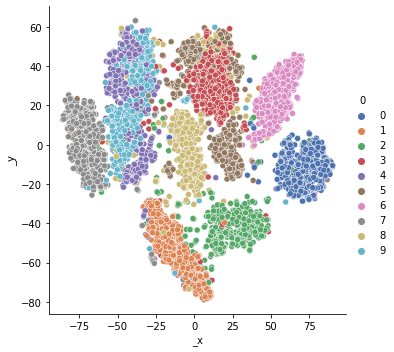

In [87]:
sns.relplot(x=embedding[:, 0], y=embedding[:, 1], palette='deep', hue=sample.loc[:, 0])

### Autoencoder
<img src="https://d1m75rqqgidzqn.cloudfront.net/wp-data/2020/04/29201743/Blog_info_29-04-2020-R-01-1024x438.png" width=750px/>

In [88]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, concatenate

def build_autoencoder():
  inp = Input(28*28, name='inp')
  enc = Dense(128, 'relu', kernel_regularizer='l1', name='enc')(inp)
  classes = Dense(10, 'relu', kernel_regularizer='l1', name='classes')(enc)
  dec = Dense(128, 'relu', kernel_regularizer='l1', name='dec')(classes)
  out = Dense(28*28, 'relu', kernel_regularizer='l1', name='out')(dec)
  model = tf.keras.Model(inputs=inp, outputs=out)
  encoder = tf.keras.Model(inputs=inp, outputs=classes)
  return model, encoder


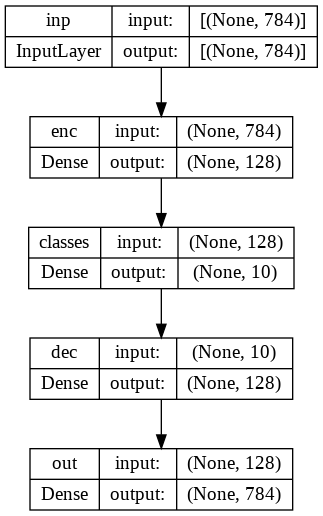

In [89]:
from tensorflow.keras.utils import plot_model
model, encoder = build_autoencoder()
plot_model(model, show_shapes=True)

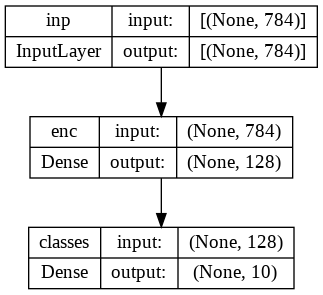

In [90]:
plot_model(encoder, show_shapes=True)

In [91]:
X = mnist_train.loc[:, 1:]

In [92]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, restore_best_weights=True)]
model.compile(loss='mean_squared_error')
%time history = model.fit(X, X, verbose=0, batch_size=1024, epochs=512, validation_split=0.2, callbacks=callbacks)

CPU times: user 24.1 s, sys: 1.63 s, total: 25.8 s
Wall time: 18.9 s


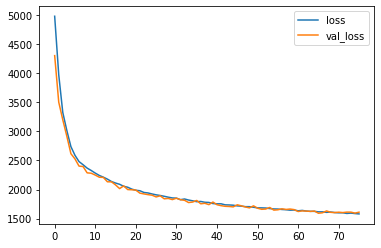

In [93]:
pd.DataFrame(history.history).plot()

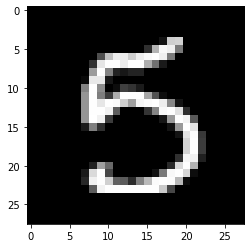

In [94]:
i = 4
img = mnist_train.iloc[i, 1:].values.reshape((28, 28))
plt.imshow(img, cmap='gray')

In [95]:
result = model.predict(mnist_train.iloc[[i], 1:])
result.shape

1/1 [==============================] - 0s 88ms/step


(1, 784)

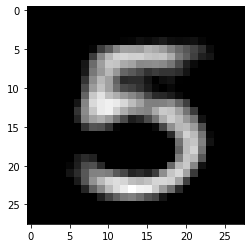

In [96]:
plt.imshow(result.reshape((28, 28)), cmap='gray')

In [97]:
encoded = encoder.predict(X)
encoded.shape

625/625 [==============================] - 1s 2ms/step


(20000, 10)

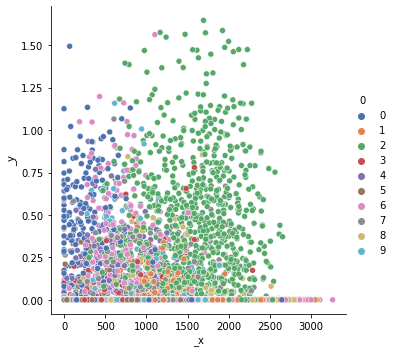

In [98]:
sns.relplot(x=encoded[:, 0], y=encoded[:, 1], palette='deep', hue=mnist_train.loc[:, 0])

In [99]:
embedding = PCA(4).fit_transform(encoded)

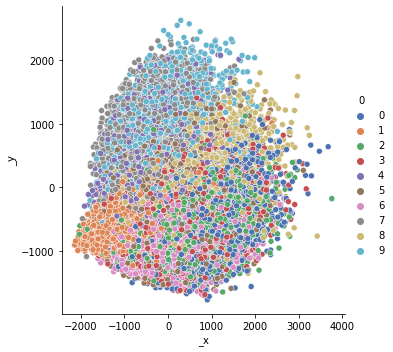

In [100]:
sns.relplot(x=embedding[:, 0], y=embedding[:, 1], palette='deep', hue=mnist_train.loc[:, 0])

## Задание
1. Кластеризовать свой датасет любой моделью
  - скорее всего понадобятся pipeline и scaler
2. Визуализировать результаты кластеризации:
  - спроецировать датасет на плоскость с помощью TSNE
  - раскрасить кластеры

In [101]:
df = pd.read_csv('/content/sample_data/NBA_2020.csv', header=0)
df = df.loc[:,['ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]
df

,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...
646,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
647,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
648,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
649,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


In [102]:
cluster = Pipeline([('prep', RobustScaler()), ('clusterer', Birch())])
cluster.fit(df)

Pipeline(steps=[('prep', RobustScaler()), ('clusterer', Birch())])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



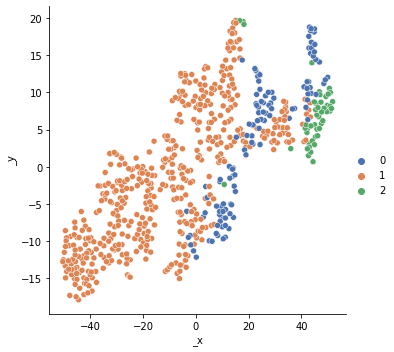

In [103]:
embedding = TSNE().fit_transform(df)
sns.relplot(x=embedding[:, 0], y=embedding[:, 1], palette='deep', hue=cluster['clusterer'].labels_)